# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key




from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)




## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count"
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city = "London"
units = "metric"

query_url = url + "APPID=" + weather_api_key + "&q=" + city

print (query_url)

weather_response = requests.get(query_url)
weather_json = weather_response.json()
print (weather_response)

pprint(weather_json)

http://api.openweathermap.org/data/2.5/weather?APPID=b1694208e973fb90f44538a116e37f99&q=London
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1596831811,
 'id': 2643743,
 'main': {'feels_like': 299.12,
          'humidity': 28,
          'pressure': 1017,
          'temp': 300.47,
          'temp_max': 303.15,
          'temp_min': 295.93},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1414,
         'sunrise': 1596774840,
         'sunset': 1596829113,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 1}}


In [77]:


for city in cities:
    query_url = url + "APPID=" + weather_api_key + "&q=" + city
    city_response = requests.get(query_url)
    city_json = city_response.json()
    print (city_response)

    pprint(city_json)
    
    
#lat = geo_data["results"][0]["geometry"]["location"]["lat"]
#lat = geo_data["results"][0]["geometry"]["location"]["lat"]

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.74, 'lon': -97.86},
 'dt': 1596831554,
 'id': 6165406,
 'main': {'feels_like': 304.71,
          'humidity': 38,
          'pressure': 1004,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_min': 304.15},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
         'sunrise': 1596797353,
         'sunset': 1596853506,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 1.5}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 22.08, 'lon': -159.32},
 'dt': 1596831894,
 'id': 5848280,
 'main': {'feels_like': 301.59,
          'humidity': 78,
          'pressure': 1019,
          'temp': 300.33,
          'temp_max': 301.15,
          'temp_min': 

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -22.28, 'lon': 44.52},
 'dt': 1596831897,
 'id': 1072879,
 'main': {'feels_like': 284.63,
          'grnd_level': 975,
          'humidity': 59,
          'pressure': 1022,
          'sea_level': 1022,
          'temp': 290.41,
          'temp_max': 290.41,
          'temp_min': 290.41},
 'name': 'Ankazoabo',
 'sys': {'country': 'MG', 'sunrise': 1596771090, 'sunset': 1596811432},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 174, 'speed': 8.01}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 70},
 'cod': 200,
 'coord': {'lat': 61.73, 'lon': 17.1},
 'dt': 1596831897,
 'id': 2704613,
 'main': {'feels_like': 290.76,
          'humidity': 80,
          'pressure': 1023,
          'temp': 290.93,
          'temp_max': 290.93,
          'temp_min': 290

          'grnd_level': 1000,
          'humidity': 90,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': 282.69,
          'temp_max': 282.69,
          'temp_min': 282.69},
 'name': 'Tiksi',
 'sys': {'country': 'RU', 'sunrise': 1596819719, 'sunset': 1596895104},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 336, 'speed': 2.08}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': -29.95, 'lon': -71.34},
 'dt': 1596831900,
 'id': 3893629,
 'main': {'feels_like': 283.58,
          'humidity': 76,
          'pressure': 1015,
          'temp': 287.15,
          'temp_max': 287.15,
          'temp_min': 287.15},
 'name': 'Coquimbo',
 'sys': {'country': 'CL',
         'id': 8514,
         'sunrise': 1596799541,
         'sunset': 1596838590,
         'type': 1},
 'timezone': -14400

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 3},
 'cod': 200,
 'coord': {'lat': 40.6, 'lon': -124.16},
 'dt': 1596831903,
 'id': 5563839,
 'main': {'feels_like': 294.66,
          'humidity': 67,
          'pressure': 1015,
          'temp': 293.89,
          'temp_max': 294.26,
          'temp_min': 293.15},
 'name': 'Fortuna',
 'sys': {'country': 'US',
         'id': 2032837,
         'sunrise': 1596806399,
         'sunset': 1596857083,
         'type': 3},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 268, 'gust': 0.45, 'speed': 0.89}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 73.51, 'lon': 80.55},
 'dt': 1596831903,
 'id': 1507390,
 'main': {'feels_like': 275.79,
          'grnd_level': 992,
          'humidity': 100,
          'pressure': 998,
          'sea_level': 998,
     

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 79},
 'cod': 200,
 'coord': {'lat': -23.12, 'lon': -134.97},
 'dt': 1596831906,
 'id': 4030556,
 'main': {'feels_like': 290.51,
          'grnd_level': 1020,
          'humidity': 70,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 294.1,
          'temp_max': 294.1,
          'temp_min': 294.1},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1596814217, 'sunset': 1596854454},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 104, 'speed': 7.58}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -24.79, 'lon': -50.01},
 'dt': 1596831906,
 'id': 3466704,
 'main': {'feels_like': 291.94,
          'grnd_level': 911,
          'humidity': 56,
          'pressure': 1022,
          'sea_level': 1022,
          'temp'

<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -15.77, 'lon': 128.73},
 'dt': 1596831908,
 'id': 2068110,
 'main': {'feels_like': 279.96,
          'humidity': 33,
          'pressure': 1015,
          'temp': 286.15,
          'temp_max': 286.15,
          'temp_min': 286.15},
 'name': 'Kununurra',
 'sys': {'country': 'AU',
         'id': 9587,
         'sunrise': 1596836752,
         'sunset': 1596878139,
         'type': 1},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 149, 'speed': 5.45}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 78},
 'cod': 200,
 'coord': {'lat': -45.58, 'lon': -72.07},
 'dt': 1596831909,
 'id': 3894426,
 'main': {'feels_like': 276.66,
          'humidity': 83,
          'pressure': 1017,
          'temp

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 18.22, 'lon': -63.06},
 'dt': 1596831912,
 'id': 3573374,
 'main': {'feels_like': 303.33,
          'humidity': 74,
          'pressure': 1017,
          'temp': 302.67,
          'temp_max': 304.15,
          'temp_min': 302.04},
 'name': 'The Valley',
 'sys': {'country': 'AI',
         'id': 8788,
         'sunrise': 1596793938,
         'sunset': 1596840219,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 100, 'speed': 7.7}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.23},
 'dt': 1596831912,
 'id': 3366880,
 'main': {'feels_like': 277.34,
          'humidity': 87,
          'pressure': 1025,
          'temp': 279.26,
          'temp_max': 279.26,
          'temp_min

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.64},
 'dt': 1596831914,
 'id': 2729907,
 'main': {'feels_like': 280.26,
          'humidity': 81,
          'pressure': 1019,
          'temp': 283.15,
          'temp_max': 283.15,
          'temp_min': 283.15},
 'name': 'Longyearbyen',
 'sys': {'country': 'SJ', 'id': 1663, 'sunrise': 0, 'sunset': 0, 'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 3.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 42.87, 'lon': -106.31},
 'dt': 1596831915,
 'id': 5820705,
 'main': {'feels_like': 299.83,
          'humidity': 8,
          'pressure': 1015,
          'temp': 307.12,
          'temp_max': 307.59,
          'temp_min': 306.48},
 'name': 'Casper',
 'sys': {'country': 'US'

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 27.9, 'lon': 102.26},
 'dt': 1596831918,
 'id': 1789647,
 'main': {'feels_like': 296.09,
          'grnd_level': 844,
          'humidity': 80,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 293.9,
          'temp_max': 293.9,
          'temp_min': 293.9},
 'name': 'Xichang',
 'rain': {'1h': 0.13},
 'sys': {'country': 'CN', 'sunrise': 1596839852, 'sunset': 1596887744},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 152, 'speed': 0.37}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 5.38, 'lon': -52.95},
 'dt': 1596831918,
 'id': 3380290,
 'main': {'feels_like': 303.33,
          'grnd_level': 1011,
          'humidity': 75,
          'pressure': 1012,
          'sea_level': 1012,
  

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.73, 'lon': -25.67},
 'dt': 1596831805,
 'id': 3372783,
 'main': {'feels_like': 296.14,
          'humidity': 78,
          'pressure': 1022,
          'temp': 296.15,
          'temp_max': 296.15,
          'temp_min': 296.15},
 'name': 'Ponta Delgada',
 'sys': {'country': 'PT',
         'id': 6899,
         'sunrise': 1596783103,
         'sunset': 1596833108,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 4.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -9.43, 'lon': 159.95},
 'dt': 1596831921,
 'id': 2108502,
 'main': {'feels_like': 298.28,
          'humidity': 94,
          'pressure': 1010,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp

 'sys': {'country': 'BO',
         'id': 8616,
         'sunrise': 1596796574,
         'sunset': 1596837635,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 5.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 69},
 'cod': 200,
 'coord': {'lat': 59.12, 'lon': 159.97},
 'dt': 1596831923,
 'id': 2122262,
 'main': {'feels_like': 278.37,
          'grnd_level': 979,
          'humidity': 87,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 283.45,
          'temp_max': 283.45,
          'temp_min': 283.45},
 'name': 'Palana',
 'sys': {'country': 'RU', 'sunrise': 1596820939, 'sunset': 1596878958},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': 

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 97},
 'cod': 200,
 'coord': {'lat': 7.69, 'lon': 126.55},
 'dt': 1596831926,
 'id': 1708743,
 'main': {'feels_like': 300.9,
          'grnd_level': 1006,
          'humidity': 77,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 298.9,
          'temp_max': 298.9,
          'temp_min': 298.9},
 'name': 'Kinablangan',
 'sys': {'country': 'PH', 'sunrise': 1596835623, 'sunset': 1596880314},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 198, 'speed': 3.42}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.21, 'lon': -115.07},
 'dt': 1596831816,
 'id': 5513343,
 'main': {'feels_like': 303.84,
          'humidity': 9,
          'pressure': 1012,
          'temp': 308.01,
          'temp_max': 308.71,
          'temp_mi

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 55.78, 'lon': -118.84},
 'dt': 1596831929,
 'id': 6153766,
 'main': {'feels_like': 282.51,
          'humidity': 42,
          'pressure': 1009,
          'temp': 291.8,
          'temp_max': 292.04,
          'temp_min': 291.15},
 'name': 'Spirit River',
 'sys': {'country': 'CA',
         'id': 900,
         'sunrise': 1596802384,
         'sunset': 1596858544,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'gust': 17, 'speed': 11.8}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -37.62, 'lon': -73.65},
 'dt': 1596831929,
 'id': 3883457,
 'main': {'feels_like': 278.78,
          'grnd_level': 1010,
          'humidity': 77,
          'pressure': 1021,
          'sea_level': 1021,

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 69.45, 'lon': -133.04},
 'dt': 1596831931,
 'id': 6170031,
 'main': {'feels_like': 284.72,
          'humidity': 77,
          'pressure': 998,
          'temp': 289.15,
          'temp_max': 289.15,
          'temp_min': 289.15},
 'name': 'Tuktoyaktuk',
 'sys': {'country': 'CA',
         'id': 942,
         'sunrise': 1596799115,
         'sunset': 1596868629,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 7.2}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': -35.17, 'lon': 173.17},
 'dt': 1596831932,
 'id': 2194098,
 'main': {'feels_like': 278.52,
          'grnd_level': 1005,
          'humidity': 65,
          'pressure': 1007,
          'sea_level': 1007,
          '

 'name': 'Calbuco',
 'sys': {'country': 'CL',
         'id': 8523,
         'sunrise': 1596801225,
         'sunset': 1596837764,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 40, 'speed': 3.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 12.52, 'lon': -70.03},
 'dt': 1596831934,
 'id': 3577154,
 'main': {'feels_like': 302.23,
          'humidity': 70,
          'pressure': 1011,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_min': 304.15},
 'name': 'Oranjestad',
 'sys': {'country': 'AW',
         'id': 8791,
         'sunrise': 1596796048,
         'sunset': 1596841454,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'm

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66.56, 'lon': 67.8},
 'dt': 1596831937,
 'id': 1512019,
 'main': {'feels_like': 280.94,
          'grnd_level': 1008,
          'humidity': 90,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 285.04,
          'temp_max': 285.04,
          'temp_min': 285.04},
 'name': 'Aksarka',
 'rain': {'1h': 1.12},
 'sys': {'country': 'RU', 'sunrise': 1596839767, 'sunset': 1596904368},
 'timezone': 18000,
 'visibility': 8392,
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 45, 'speed': 6.04}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -4.35, 'lon': 152.26},
 'dt': 1596831937,
 'id': 2093685,
 'main': {'feels_like': 300.62,
          'grnd_level': 999,
          'humidity': 83,
          'pressure': 1009,
          'sea_level': 100

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 27.91, 'lon': -97.15},
 'dt': 1596831940,
 'id': 4671141,
 'main': {'feels_like': 308,
          'humidity': 66,
          'pressure': 1016,
          'temp': 305.48,
          'temp_max': 306.15,
          'temp_min': 304.82},
 'name': 'Aransas Pass',
 'sys': {'country': 'US',
         'id': 6018,
         'sunrise': 1596801294,
         'sunset': 1596849224,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'gust': 9.3, 'speed': 5.7}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 28.5, 'lon': -13.86},
 'dt': 1596831940,
 'id': 2512186,
 'main': {'feels_like': 294.53,
          'humidity': 69,
          'pressure': 1018,
          'temp': 297.15,
          'temp_max': 297.15,
 

 'rain': {'1h': 0.14},
 'sys': {'country': 'MX', 'sunrise': 1596800287, 'sunset': 1596846991},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 43, 'speed': 4.48}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 11, 'lon': 122.67},
 'dt': 1596831944,
 'id': 1714733,
 'main': {'feels_like': 301.59,
          'grnd_level': 1003,
          'humidity': 88,
          'pressure': 1006,
          'sea_level': 1006,
          'temp': 298.57,
          'temp_max': 298.57,
          'temp_min': 298.57},
 'name': 'Dingle',
 'sys': {'country': 'PH', 'sunrise': 1596836316, 'sunset': 1596881484},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 219, 'speed': 3.4}}
<Response

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 9.14, 'lon': 99.33},
 'dt': 1596831947,
 'id': 1150515,
 'main': {'feels_like': 305.51,
          'humidity': 97,
          'pressure': 1006,
          'temp': 300.37,
          'temp_max': 300.37,
          'temp_min': 300.37},
 'name': 'Surat Thani',
 'sys': {'country': 'TH',
         'id': 2032359,
         'sunrise': 1596842052,
         'sunset': 1596886949,
         'type': 3},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 209, 'speed': 3.41}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 49.82, 'lon': -94.43},
 'dt': 1596831947,
 'id': 5991056,
 'main': {'feels_like': 299.97,
          'humidity': 57,
          'pressure': 1011,
          'temp': 300.15,
          'temp_max': 300.15,
          

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 39.89, 'lon': 4.27},
 'dt': 1596831950,
 'id': 2514301,
 'main': {'feels_like': 300.11,
          'humidity': 78,
          'pressure': 1019,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Mahon',
 'sys': {'country': 'ES',
         'id': 6422,
         'sunrise': 1596775646,
         'sunset': 1596826194,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.52, 'lon': 57.52},
 'dt': 1596831950,
 'id': 933995,
 'main': {'feels_like': 294.03,
          'humidity': 77,
          'pressure': 1020,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 '

<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 46.41, 'lon': -105.84},
 'dt': 1596831953,
 'id': 5666176,
 'main': {'feels_like': 300.97,
          'humidity': 25,
          'pressure': 1010,
          'temp': 304.15,
          'temp_max': 304.15,
          'temp_min': 304.15},
 'name': 'Miles City',
 'sys': {'country': 'US',
         'id': 4930,
         'sunrise': 1596801160,
         'sunset': 1596853529,
         'type': 1},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'gust': 7.7, 'speed': 4.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 65.28, 'lon': -126.83},
 'dt': 1596831852,
 'id': 6089245,
 'main': {'feels_like': 289.31,
          'humidity': 87,
          'pressure': 995,
  

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 13.22, 'lon': -59.52},
 'dt': 1596831956,
 'id': 3374083,
 'main': {'feels_like': 302.62,
          'humidity': 74,
          'pressure': 1014,
          'temp': 303.15,
          'temp_max': 303.15,
          'temp_min': 303.15},
 'name': 'Bathsheba',
 'sys': {'country': 'BB',
         'id': 8772,
         'sunrise': 1596793473,
         'sunset': 1596838985,
         'type': 1},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 9.8}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.92, 'lon': 46.71},
 'dt': 1596831956,
 'id': 797213,
 'main': {'feels_like': 297.21,
          'grnd_level': 1013,
          'humidity': 35,
          'pressure': 1011,
          'sea_level': 1011,
          'tem

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -23.53, 'lon': 148.17},
 'dt': 1596831958,
 'id': 2167426,
 'main': {'feels_like': 284.62,
          'humidity': 77,
          'pressure': 1015,
          'temp': 287.65,
          'temp_max': 288.15,
          'temp_min': 287.04},
 'name': 'Emerald',
 'sys': {'country': 'AU',
         'id': 9524,
         'sunrise': 1596832688,
         'sunset': 1596872872,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 4.6}}
<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 41.37, 'lon': -73.41},
 'dt': 1596831883,
 'id': 5282297,
 'main': {'feels_like': 298.1,
          'humidity': 57,
          'pressure': 1021,
          'tem

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -2.02, 'lon': 147.27},
 'dt': 1596831962,
 'id': 2092164,
 'main': {'feels_like': 303.13,
          'grnd_level': 1008,
          'humidity': 80,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 299.42,
          'temp_max': 299.42,
          'temp_min': 299.42},
 'name': 'Lorengau',
 'sys': {'country': 'PG', 'sunrise': 1596831329, 'sunset': 1596874663},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 192, 'speed': 1.82}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 62.89, 'lon': 54.96},
 'dt': 1596831962,
 'id': 471308,
 'main': {'feels_like': 283.82,
          'grnd_level': 988,
          'humidity': 99,
          'pressure': 1014,
          'sea_level': 1014,
          'te

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 23.38, 'lon': -105.38},
 'dt': 1596831964,
 'id': 4007676,
 'main': {'feels_like': 298.7,
          'grnd_level': 826,
          'humidity': 78,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 296.67,
          'temp_max': 296.67,
          'temp_min': 296.67},
 'name': 'Pueblo Nuevo',
 'rain': {'1h': 1.69},
 'sys': {'country': 'MX', 'sunrise': 1596803673, 'sunset': 1596850795},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 2.02}}
<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 30.15, 'lon': 62.6},
 'dt': 1596831965,
 'id': 1128239,
 'main': {'feels_like': 299.81,
          'grnd_level': 937,
          'hum

 'sys': {'country': 'PF', 'sunrise': 1596817726, 'sunset': 1596858998},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 39, 'speed': 9.5}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 54},
 'cod': 200,
 'coord': {'lat': -35.43, 'lon': -60.17},
 'dt': 1596831967,
 'id': 3833112,
 'main': {'feels_like': 284.07,
          'humidity': 75,
          'pressure': 1027,
          'temp': 286.48,
          'temp_max': 286.48,
          'temp_min': 286.48},
 'name': 'Veinticinco de Mayo',
 'sys': {'country': 'AR',
         'id': 2019609,
         'sunrise': 1596797396,
         'sunset': 1596835373,
         'type': 3},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 113, 'gust': 5.81, 'speed': 3.13}}


<Response [200]>
{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': -20.1, 'lon': 146.27},
 'dt': 1596831971,
 'id': 2171722,
 'main': {'feels_like': 286.18,
          'grnd_level': 979,
          'humidity': 37,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 292.02,
          'temp_max': 292.02,
          'temp_min': 292.02},
 'name': 'Charters Towers',
 'sys': {'country': 'AU', 'sunrise': 1596832872, 'sunset': 1596873601},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 206, 'speed': 6.42}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.32, 'lon': -0.93},
 'dt': 1596831971,
 'id': 3000071,
 'main': {'feels_like': 298.75,
          'humidity': 78,
          'pressure': 1017,
          'temp': 298.18,
          'temp_max': 299.26,
          't

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.44, 'lon': -20.27},
 'dt': 1596831973,
 'id': 3412093,
 'main': {'feels_like': 279.34,
          'humidity': 93,
          'pressure': 999,
          'temp': 283.15,
          'temp_max': 283.15,
          'temp_min': 283.15},
 'name': 'Vestmannaeyjar',
 'sys': {'country': 'IS',
         'id': 93,
         'sunrise': 1596776051,
         'sunset': 1596837567,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 260, 'speed': 5.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.25, 'lon': 55.17},
 'dt': 1596831974,
 'id': 132938,
 'main': {'feels_like': 296.18,
          'humidity': 53,
          'pressure': 1012,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 29

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1596831775,
 'id': 5367788,
 'main': {'feels_like': 287.83,
          'humidity': 72,
          'pressure': 1016,
          'temp': 291.25,
          'temp_max': 291.48,
          'temp_min': 291.15},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4747,
         'sunrise': 1596806217,
         'sunset': 1596855490,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'gust': 8.2, 'speed': 6.2}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 27.91, 'lon': -15.45},
 'dt': 1596831976,
 'id': 2522325,
 'main': {'feels_like': 290.12,
          'humidity': 60,
          'pressure': 1018,
          'temp': 296.4,
          'temp_max': 297.15,
          't

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -33.92, 'lon': 151.22},
 'dt': 1596831979,
 'id': 2161608,
 'main': {'feels_like': 282.37,
          'humidity': 100,
          'pressure': 1013,
          'temp': 284.2,
          'temp_max': 285.93,
          'temp_min': 283.15},
 'name': 'Kensington',
 'sys': {'country': 'AU',
         'id': 9600,
         'sunrise': 1596832885,
         'sunset': 1596871211,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 3.1}}
<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -14.83, 'lon': -64.9},
 'dt': 1596831962,
 'id': 3902377,
 'main': {'feels_like': 307.94,
   

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 6.87, 'lon': 101.37},
 'dt': 1596831982,
 'id': 1604771,
 'main': {'feels_like': 303.62,
          'grnd_level': 1007,
          'humidity': 86,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 299.21,
          'temp_max': 299.21,
          'temp_min': 299.21},
 'name': 'Yaring',
 'rain': {'1h': 0.51},
 'sys': {'country': 'TH', 'sunrise': 1596841724, 'sunset': 1596886298},
 'timezone': 25200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 176, 'speed': 1.62}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': 0.47, 'lon': 35.97},
 'dt': 1596831982,
 'id': 200575,
 'main': {'feels_like': 293.82,
          'grnd_level': 899,
          'humidity': 78,
          'pressure': 1018,
          'sea_level': 1018,
  

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 34.44, 'lon': -85.72},
 'dt': 1596831985,
 'id': 4062861,
 'main': {'feels_like': 305.09,
          'humidity': 66,
          'pressure': 1019,
          'temp': 302.19,
          'temp_max': 303.15,
          'temp_min': 300.93},
 'name': 'Fort Payne',
 'sys': {'country': 'US',
         'id': 2940,
         'sunrise': 1596797896,
         'sunset': 1596847136,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 2.6}}
<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 16.33, 'lon': -61.35},
 'dt': 1596831985,
 'id': 3578967,
 'main': {'feels_like': 305.56,
          'humidity': 66,
          'pressure': 1015,
       

 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 2.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 44.77, 'lon': -117.83},
 'dt': 1596831988,
 'id': 5712169,
 'main': {'feels_like': 287.87,
          'humidity': 28,
          'pressure': 1021,
          'temp': 292.96,
          'temp_max': 294.26,
          'temp_min': 289.82},
 'name': 'Baker City',
 'sys': {'country': 'US',
         'id': 3453,
         'sunrise': 1596804296,
         'sunset': 1596856148,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'speed': 4.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 85},
 'cod': 200,
 'coord': {'lat': 10.93, 'lon': 108.1},
 'dt': 1596831988,
 'id': 1571

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 36.73, 'lon': 25.28},
 'dt': 1596831990,
 'id': 261772,
 'main': {'feels_like': 300.84,
          'humidity': 73,
          'pressure': 1010,
          'temp': 298,
          'temp_max': 298.71,
          'temp_min': 297.15},
 'name': 'Íos',
 'sys': {'country': 'GR',
         'id': 6634,
         'sunrise': 1596770985,
         'sunset': 1596820772,
         'type': 1},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 14.92, 'lon': -23.51},
 'dt': 1596831991,
 'id': 3374333,
 'main': {'feels_like': 301.66,
          'humidity': 88,
          'pressure': 1015,
          'temp': 299.15,
          'temp_max': 299.15,
          'temp_min': 299.15},
 'name'

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 29.03, 'lon': 21.55},
 'dt': 1596831993,
 'id': 86049,
 'main': {'feels_like': 301.1,
          'grnd_level': 1006,
          'humidity': 34,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 304.99,
          'temp_max': 304.99,
          'temp_min': 304.99},
 'name': 'Jalu',
 'sys': {'country': 'LY', 'sunrise': 1596772689, 'sunset': 1596820857},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 344, 'speed': 7.37}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -22.96, 'lon': 14.51},
 'dt': 1596831993,
 'id': 3359638,
 'main': {'feels_like': 286.24,
          'humidity': 87,
          'pressure': 1019,
          'temp': 286.81,
          'temp_max': 287.59,
          'temp_min': 286.15},
 '

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 58.21, 'lon': -6.39},
 'dt': 1596831996,
 'id': 2636790,
 'main': {'feels_like': 284.55,
          'humidity': 82,
          'pressure': 1016,
          'temp': 286.29,
          'temp_max': 286.48,
          'temp_min': 286.15},
 'name': 'Stornoway',
 'sys': {'country': 'GB',
         'id': 1450,
         'sunrise': 1596774677,
         'sunset': 1596832280,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 260, 'speed': 2.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 27.27, 'lon': 91.24},
 'dt': 1596831996,
 'id': 1252514,
 'main': {'feels_like': 294.53,
          'grnd_level': 826,
          'humidity': 95,
          'pressure': 1008,
          'sea_level': 1008,
          'temp': 291.94,
          'tem

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -1.2, 'lon': -46.02},
 'dt': 1596831999,
 'id': 3402648,
 'main': {'feels_like': 302.62,
          'grnd_level': 1011,
          'humidity': 69,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 301.12,
          'temp_max': 301.12,
          'temp_min': 301.12},
 'name': 'Carutapera',
 'sys': {'country': 'BR', 'sunrise': 1596791265, 'sunset': 1596834713},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 85, 'speed': 4.38}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.62, 'lon': -119.31},
 'dt': 1596831999,
 'id': 5379533,
 'main': {'feels_like': 300.12,
          'humidity': 37,
          'pressure': 1013,
          'temp': 300.83,
          'temp_max': 304.82,
          'tem

<Response [404]>
{'cod': '404', 'message': 'city not found'}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -22.88, 'lon': -43.1},
 'dt': 1596832002,
 'id': 3456283,
 'main': {'feels_like': 298.08,
          'humidity': 73,
          'pressure': 1023,
          'temp': 297.35,
          'temp_max': 299.26,
          'temp_min': 296.15},
 'name': 'Niterói',
 'sys': {'country': 'BR',
         'id': 8429,
         'sunrise': 1596792158,
         'sunset': 1596832418,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 3.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 0.53, 'lon': 72.93},
 'dt': 1596832003,
 'id': 1337610,
 'main': {'feels_like': 303.02,
          'grnd_level': 1009,
          'humidity': 80,
          'press

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 25.05, 'lon': 61.74},
 'dt': 1596832005,
 'id': 1175712,
 'main': {'feels_like': 304.78,
          'grnd_level': 998,
          'humidity': 87,
          'pressure': 998,
          'sea_level': 998,
          'temp': 300.63,
          'temp_max': 300.63,
          'temp_min': 300.63},
 'name': 'Jiwani',
 'rain': {'1h': 0.72},
 'sys': {'country': 'PK', 'sunrise': 1596849835, 'sunset': 1596897208},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 188, 'speed': 3.35}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 68, 'lon': 35.01},
 'dt': 1596832006,
 'id': 533933,
 'main': {'feels_like': 281.64,
          'grnd_level': 1002,
          'humidity': 92,
          'pressure': 1022,
          'sea_level': 1022,
      

 'wind': {'deg': 30, 'speed': 3.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 70.86, 'lon': 29.09},
 'dt': 1596832008,
 'id': 780687,
 'main': {'feels_like': 280.44,
          'humidity': 81,
          'pressure': 1022,
          'temp': 284.78,
          'temp_max': 285.15,
          'temp_min': 284.15},
 'name': 'Berlevåg',
 'sys': {'country': 'NO',
         'id': 1620,
         'sunrise': 1596758292,
         'sunset': 1596831636,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 5.7}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 41.78, 'lon': 126.03},
 'dt': 1596832009,
 'id': 2037494,
 'main': {'feels_like': 293.11,
          'grnd_level': 958,
          'humidity': 88,
          'pressure': 1005,
          '

              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 3.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.38, 'lon': -5.98},
 'dt': 1596832008,
 'id': 2510911,
 'main': {'feels_like': 304.06,
          'humidity': 51,
          'pressure': 1015,
          'temp': 303.37,
          'temp_max': 307.04,
          'temp_min': 300.93},
 'name': 'Seville',
 'sys': {'country': 'ES',
         'id': 6444,
         'sunrise': 1596778416,
         'sunset': 1596828344,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 3.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -9.67, 'lon': -35.74},
 'dt': 1596831713,
 'id': 3395981,
 'main': {'feels_like': 296.58,
          'humidity': 65,
          'pressure': 1019,
          'te

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -31.42, 'lon': -64.5},
 'dt': 1596832014,
 'id': 3832791,
 'main': {'feels_like': 283.87,
          'humidity': 44,
          'pressure': 1021,
          'temp': 287.95,
          'temp_max': 288.15,
          'temp_min': 287.59},
 'name': 'Villa Carlos Paz',
 'sys': {'country': 'AR',
         'id': 8226,
         'sunrise': 1596798037,
         'sunset': 1596836810,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 3.6}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 15.13, 'lon': -23.22},
 'dt': 1596832014,
 'id': 3374120,
 'main': {'feels_like': 301.66,
          'humidity': 88,
          'pressure': 1015,
          'temp': 299.15,
          'temp_max': 299.15,
          'temp

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 7.75, 'lon': 123.14},
 'dt': 1596832017,
 'id': 1708431,
 'main': {'feels_like': 301.66,
          'grnd_level': 1007,
          'humidity': 88,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 297.44,
          'temp_max': 297.44,
          'temp_min': 297.44},
 'name': 'Kumalarang',
 'sys': {'country': 'PH', 'sunrise': 1596836437, 'sunset': 1596881137},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 87, 'speed': 0.82}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 6.88, 'lon': 73.1},
 'dt': 1596832017,
 'id': 1337612,
 'main': {'feels_like': 302.84,
          'grnd_level': 1009,
          'humidity': 77,
          'pressure': 1009,
          'sea_level': 1009,
          'tem

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 37.12, 'lon': -120.26},
 'dt': 1596832019,
 'id': 5336667,
 'main': {'feels_like': 303.09,
          'humidity': 37,
          'pressure': 1013,
          'temp': 303.02,
          'temp_max': 303.71,
          'temp_min': 302.15},
 'name': 'Chowchilla',
 'sys': {'country': 'US',
         'id': 4822,
         'sunrise': 1596805890,
         'sunset': 1596855721,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0, 'speed': 1.5}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 14.9, 'lon': -12.46},
 'dt': 1596832020,
 'id': 2252606,
 'main': {'feels_like': 306.96,
          'grnd_level': 1005,
          'humidity': 44,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 3

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': -21.64, 'lon': -41.05},
 'dt': 1596832022,
 'id': 3448903,
 'main': {'feels_like': 295.09,
          'humidity': 64,
          'pressure': 1025,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'São João da Barra',
 'sys': {'country': 'BR',
         'id': 8337,
         'sunrise': 1596791566,
         'sunset': 1596832026,
         'type': 1},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 80, 'speed': 6.2}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 60.05, 'lon': 69.9},
 'dt': 1596832023,
 'id': 1506268,
 'main': {'feels_like': 287.72,
          'grnd_level': 1009,
          'humidity': 65,
          'pressure': 1013,
          'sea_level': 1013,
          'tem

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 15.74, 'lon': -96.47},
 'dt': 1596832025,
 'id': 3517970,
 'main': {'feels_like': 302.34,
          'humidity': 78,
          'pressure': 1012,
          'temp': 300.55,
          'temp_max': 300.93,
          'temp_min': 300.15},
 'name': 'Pochutla',
 'sys': {'country': 'MX',
         'id': 7096,
         'sunrise': 1596802151,
         'sunset': 1596848041,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 5.1}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 64.25, 'lon': -15.21},
 'dt': 1596832025,
 'id': 2630299,
 'main': {'feels_like': 280.83,
          'humidity': 87,
          'pressure': 1001,
          'temp': 285.15,
          'temp_max': 285.15,
          'temp_mi

 'name': 'Mayumba',
 'sys': {'country': 'GA', 'sunrise': 1596777820, 'sunset': 1596820954},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 193, 'speed': 3.64}}
<Response [200]>
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': 5.14},
 'dt': 1596832028,
 'id': 3146487,
 'main': {'feels_like': 290.28,
          'humidity': 82,
          'pressure': 1019,
          'temp': 291.98,
          'temp_max': 292.59,
          'temp_min': 291.15},
 'name': 'Raudeberg',
 'sys': {'country': 'NO',
         'id': 1616,
         'sunrise': 1596770574,
         'sunset': 1596830849,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 190, 'speed': 5.1}}
<Response [200]>

In [117]:



for city in cities:
    
   
    try:
    
       
        query_url = url + "APPID=" + weather_api_key + "&q=" + city
        city_response = requests.get(query_url)
        city_json = city_response.json()
        responses = []
        temp = city_json['main']['temp'] 
        name = city_json['name']
        humidity = city_json['main']['humidity']
        lat = city_json['coord']['lat']
        lng = city_json['coord']['lon']
    
        cityid = city_json['id']
        print(f"The city of {name} has an ID of {cityid} and a temperature of {temp}")
        
    # Handle exceptions for a city that is not available 
    except:
        print ('not found')
        pass
    
    
        
    
   

The city of Thompson has an ID of 6165406 and a temperature of 303.15
The city of Kapaa has an ID of 5848280 and a temperature of 302.37
The city of Saint George has an ID of 5546220 and a temperature of 310.14
The city of Jamestown has an ID of 5122534 and a temperature of 293.88
The city of Mehrān has an ID of 124291 and a temperature of 301.15
The city of Ushuaia has an ID of 3833367 and a temperature of 275.15
The city of Klaksvík has an ID of 2618795 and a temperature of 284.15
The city of Cidreira has an ID of 3466165 and a temperature of 288.29
The city of Batemans Bay has an ID of 2176639 and a temperature of 284.82
The city of Iqaluit has an ID of 5983720 and a temperature of 286.04
The city of Port Lincoln has an ID of 2063036 and a temperature of 286.42
The city of Airai has an ID of 1651810 and a temperature of 294.07
The city of Ankazoabo has an ID of 1072879 and a temperature of 290.13
The city of Hudiksvall has an ID of 2704613 and a temperature of 287.59
The city of Mar

The city of Sitka has an ID of 5557293 and a temperature of 286.15
The city of Banjar has an ID of 1650232 and a temperature of 298.15
The city of Kalmunai has an ID of 1242110 and a temperature of 300.51
The city of Nelson Bay has an ID of 2155562 and a temperature of 284.67
The city of Kruisfontein has an ID of 986717 and a temperature of 281.81
The city of Tura has an ID of 1254046 and a temperature of 298
The city of Bambanglipuro has an ID of 1650434 and a temperature of 298.01
The city of Santa Cruz de la Sierra has an ID of 3904906 and a temperature of 296.15
The city of Palana has an ID of 2122262 and a temperature of 286.25
The city of Hilo has an ID of 5855927 and a temperature of 297.36
The city of Qaanaaq has an ID of 3831208 and a temperature of 276.72
not found
The city of Pemberton has an ID of 6100799 and a temperature of 287.15
The city of Maniitsoq has an ID of 3421982 and a temperature of 279.25
The city of Bredasdorp has an ID of 1015776 and a temperature of 275.15


The city of La Palma has an ID of 5364022 and a temperature of 300.08
The city of Ancud has an ID of 3899695 and a temperature of 281.15
The city of Te Anau has an ID of 2181625 and a temperature of 279.83
The city of Mahon has an ID of 2514301 and a temperature of 295.15
The city of Souillac has an ID of 933995 and a temperature of 290.15
The city of Kadoma has an ID of 1860871 and a temperature of 303.86
The city of Feijó has an ID of 3664243 and a temperature of 297.49
The city of Shakawe has an ID of 933077 and a temperature of 285.83
The city of Khani has an ID of 610864 and a temperature of 294.15
The city of Dassel has an ID of 2938813 and a temperature of 290.47
The city of Pacific Grove has an ID of 5380437 and a temperature of 293.59
not found
The city of Peterhead has an ID of 2640351 and a temperature of 285.22
The city of Taoudenni has an ID of 2450173 and a temperature of 312.25
The city of Arrondissement de Bernay has an ID of 3033307 and a temperature of 292.59
The city

The city of Marquette has an ID of 5000950 and a temperature of 296.21
The city of Sarangani has an ID of 1687186 and a temperature of 301.79
The city of Sanica has an ID of 3191302 and a temperature of 293.15
The city of Baykit has an ID of 1510689 and a temperature of 294.5
The city of Inhambane has an ID of 1045114 and a temperature of 289.52
The city of Srednekolymsk has an ID of 2121025 and a temperature of 289.95
The city of Sibolga has an ID of 1213855 and a temperature of 299.83
The city of Cayenne has an ID of 3382160 and a temperature of 299.15
The city of Bandundu Province has an ID of 2317397 and a temperature of 299.49
The city of Kensington has an ID of 2161608 and a temperature of 288.02
not found
not found
The city of La Santisima Trinidad has an ID of 3902377 and a temperature of 297.12
not found
The city of Port-Gentil has an ID of 2396518 and a temperature of 297.32
The city of Queenstown has an ID of 963516 and a temperature of 275.08
The city of Trofors has an ID o

The city of Katsuura has an ID of 2112309 and a temperature of 301.34
The city of Labytnangi has an ID of 1500933 and a temperature of 283.8
The city of Raja has an ID of 368246 and a temperature of 293.54
The city of Zeya has an ID of 2012593 and a temperature of 286.05
The city of Jiwani has an ID of 1175712 and a temperature of 300.82
The city of Lovozero has an ID of 533933 and a temperature of 284.17
The city of Grodzisk Mazowiecki has an ID of 771401 and a temperature of 292.2
The city of City of San Pedro has an ID of 1688781 and a temperature of 301.18
The city of Sola has an ID of 2134814 and a temperature of 301.15
The city of Kyzyl-Suu has an ID of 1527497 and a temperature of 292.12
The city of Samarai has an ID of 2132606 and a temperature of 300.12
The city of Sabha has an ID of 2212775 and a temperature of 302.27
The city of Buraidah has an ID of 107304 and a temperature of 304.15
The city of Yuanping has an ID of 1786060 and a temperature of 294.37
The city of Broome ha

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [136]:
print (city_json)

#city_json
#save to csv
import csv
import json

temp = []
name = []
humidity = []
lat = []
lng = []
clouds = []
wind = []

for city in cities:
    
    try:
    
       
        query_url = url + "APPID=" + weather_api_key + "&q=" + city
        city_response = requests.get(query_url)
        city_json = city_response.json()
        temp.append(city_json['main']['temp'])
        name.append(city_json['name'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        clouds.append(city_json['clouds']['all'])
        wind.append(city_json['wind']['speed'])]
        

    except:

        pass

#weather_df = pd.DataFrame(city_json)
#weather_df.to_csv 
#(r'Path where the new CSV file will be stored\New File Name.csv', index = None)
#city_response.to_csv("city_data.csv", encoding="utf-8", index=False)

#weather_df.head()


{'coord': {'lon': -24.98, 'lat': 16.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.15, 'feels_like': 299.79, 'temp_min': 299.15, 'temp_max': 299.15, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1596855593, 'sys': {'type': 1, 'id': 2467, 'country': 'CV', 'sunrise': 1596871317, 'sunset': 1596917348}, 'timezone': -3600, 'id': 3374462, 'name': 'Mindelo', 'cod': 200}


In [142]:
weather_dict = {
    "city": name,
    "humidity": humidity,
    "temp": temp,
    "lat": lat,
    "lng": lat,
    "clouds": clouds,
    "wind": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

 

,city,humidity,temp,lat,lng,clouds,wind
0,Thompson,65,299.15,55.74,55.74,75,2.6
1,Kapaa,74,301.07,22.08,22.08,90,5.7
2,Saint George,7,307.05,37.10,37.10,1,4.1
3,Jamestown,72,291.35,42.10,42.10,1,2.6
4,Mehrān,33,298.15,33.12,33.12,0,1.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [143]:
weather_data.dtypes
weather_data_new = weather_data.convert_dtypes()

weather_data_new["humidity"]=weather_data_new["humidity"].astype(float)

weather_data_new.dtypes

#weather_no_rain = weather_data.loc[(weather_data["humidity"] < "100")]

city         string
humidity    float64
temp        float64
lat         float64
lng         float64
clouds        Int64
wind        float64
dtype: object

In [141]:
weather_data1 = weather_data_new.loc[(weather_data_new['humidity'] < 100)]
weather_data1.head()
weather_data_df = pd.DataFrame(weather_data1)
weather_data_df

,city,humidity,temp,lat,lng,clouds,wind
0,Thompson,65.0,299.15,55.74,55.74,75,2.60
1,Kapaa,74.0,301.07,22.08,22.08,90,5.70
2,Saint George,7.0,307.05,37.10,37.10,1,4.10
3,Jamestown,72.0,291.35,42.10,42.10,1,2.60
4,Mehrān,33.0,298.15,33.12,33.12,0,1.00
...,...,...,...,...,...,...,...
561,Raudeberg,82.0,292.05,61.99,61.99,100,4.60
562,Doka,96.0,293.31,13.52,13.52,99,3.41
563,Karratha,37.0,295.07,-20.74,-20.74,0,10.19
564,Māngrol,79.0,302.02,21.12,21.12,100,9.92


In [162]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
import csv 
import os
#save to csv
clean_weather_new = weather_data_df.to_csv('~/desktop/clean_weather3.csv')



#clean_weather_df=pd.read_csv(clean_weather_new)


AttributeError: 'NoneType' object has no attribute 'head'

In [167]:
weather_data_df.dtypes

city         string
humidity    float64
temp        float64
lat         float64
lng         float64
clouds        Int64
wind        float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

R squared: 0.0006902341989857739


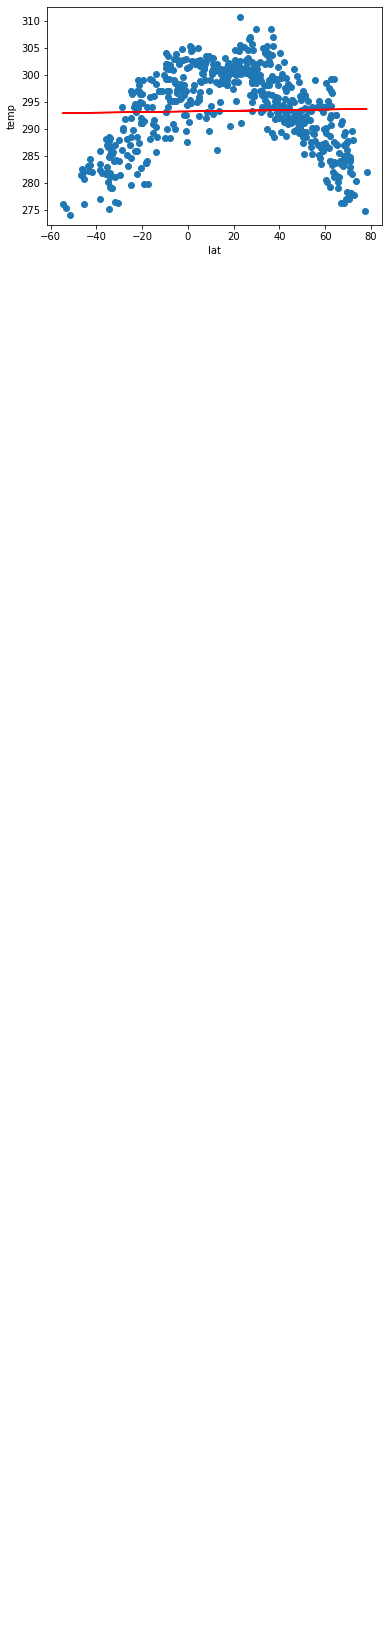

In [176]:
x_values = weather_data_df['lat']
y_values = weather_data_df['temp']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

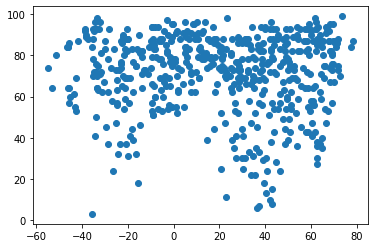

In [171]:
x_values = weather_data_df['lat']
y_values = weather_data_df['humidity']

plt.scatter(x_values,y_values)

## Latitude vs. Cloudiness Plot

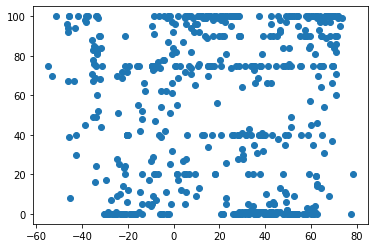

In [172]:
x_values = weather_data_df['lat']
y_values = weather_data_df['clouds']

plt.scatter(x_values,y_values)

## Latitude vs. Wind Speed Plot

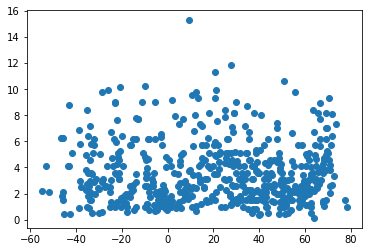

In [173]:
x_values = weather_data_df['lat']
y_values = weather_data_df['wind']

plt.scatter(x_values,y_values)

## Linear Regression

In [182]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = weather_data_df.loc[(weather_data_df['lat'] >0)]
south_hem = weather_data_df.loc[(weather_data_df['lat']<0)]

north_hem_df = pd.DataFrame(north_hem)
south_hem_df = pd.DataFrame(south_hem)

north_hem_df.head()
south_hem_df.head()


,city,humidity,temp,lat,lng,clouds,wind
5,Ushuaia,74.0,276.15,-54.80,-54.80,75,2.17
7,Cidreira,83.0,288.09,-30.18,-30.18,0,2.39
10,Port Lincoln,72.0,286.70,-34.73,-34.73,85,6.44
11,Airai,51.0,297.13,-8.93,-8.93,29,1.18
12,Ankazoabo,70.0,288.63,-22.28,-22.28,14,7.65


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.5389742306268139


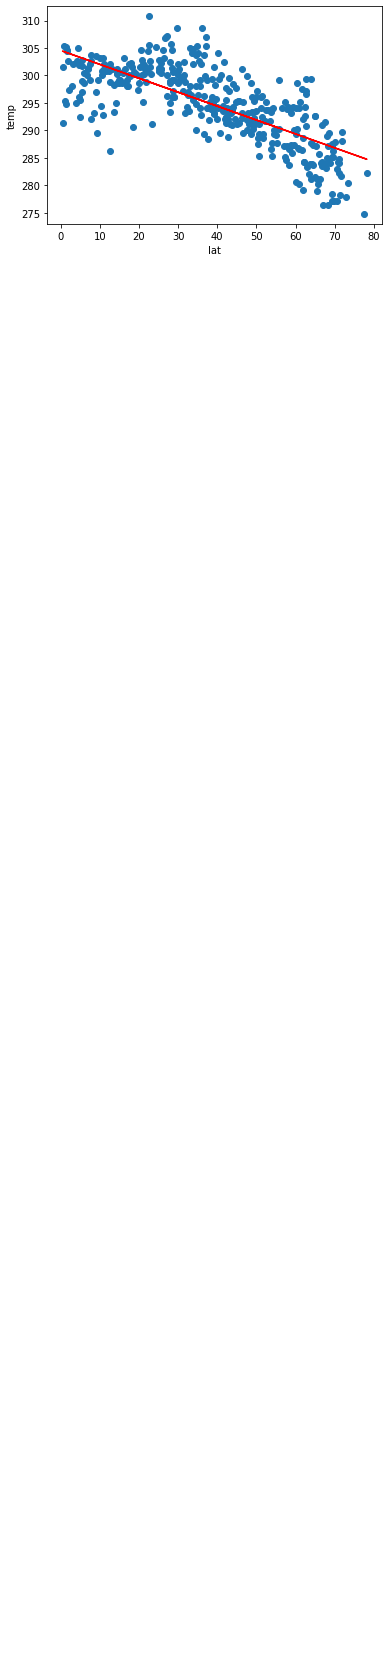

In [183]:
x_values = north_hem_df['lat']
y_values = north_hem_df['temp']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6181888804387645


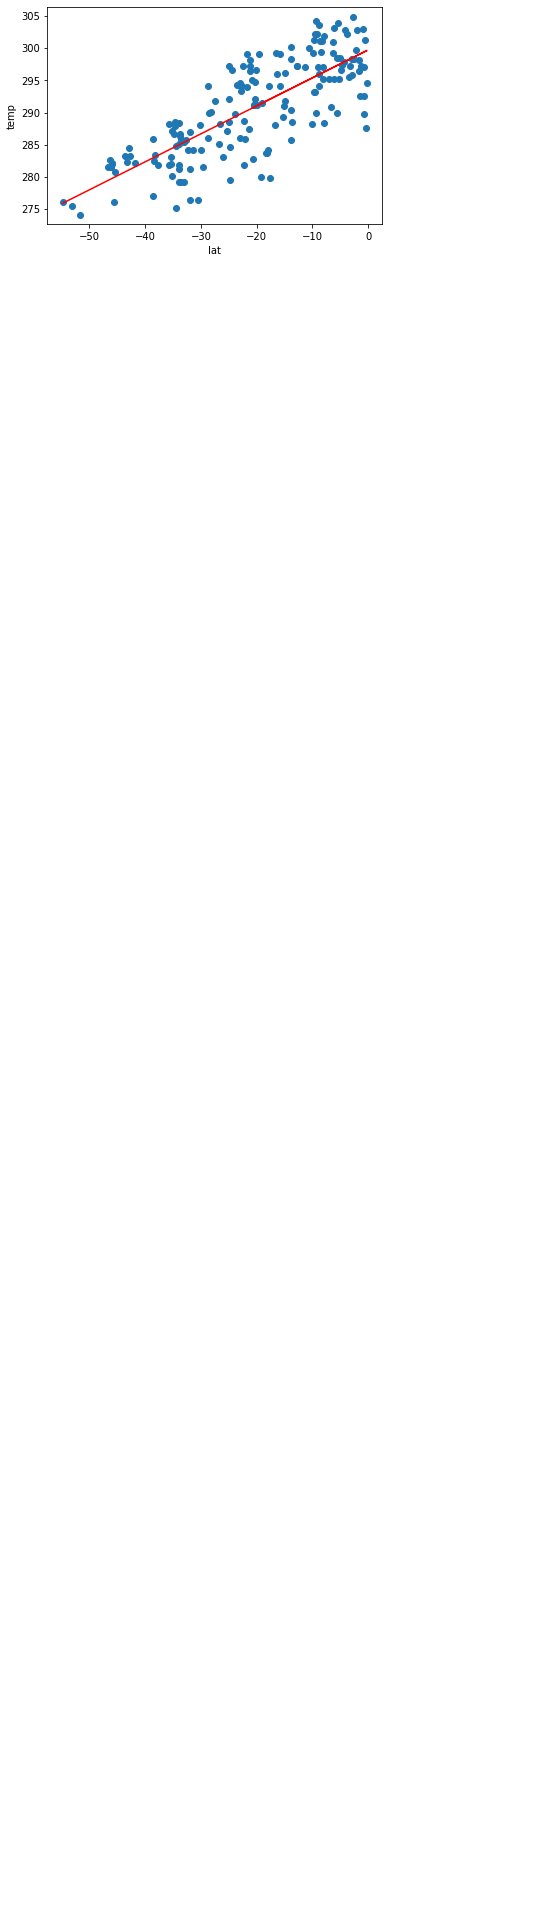

In [184]:
x_values = south_hem_df['lat']
y_values = south_hem_df['temp']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0014121937418690278


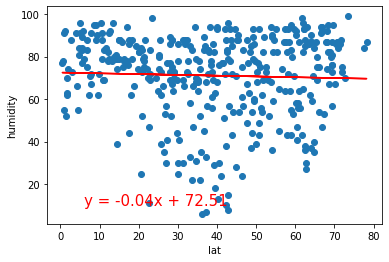

In [185]:
x_values = north_hem_df['lat']
y_values = north_hem_df['humidity']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.6181888804387645


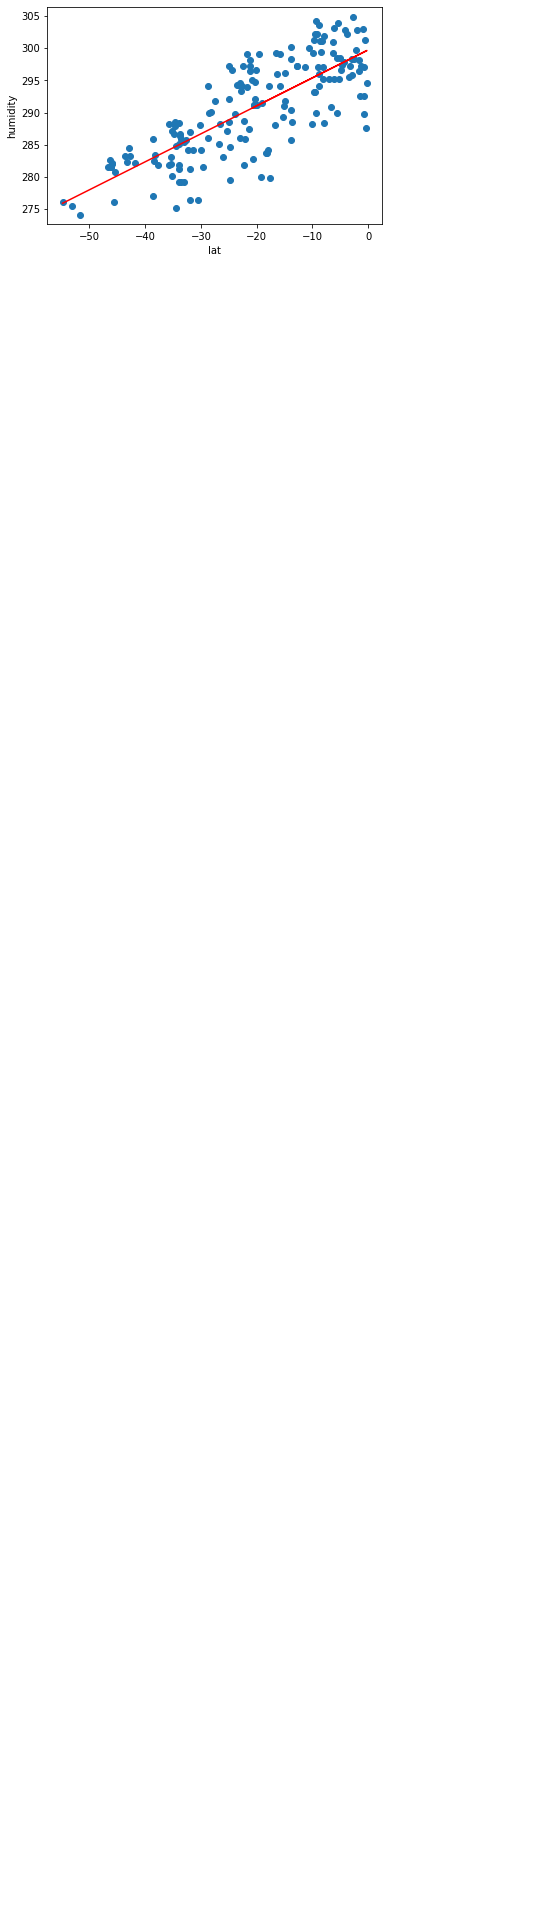

In [186]:
x_values = south_hem_df['lat']
y_values = south_hem_df['temp']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

AttributeError: 'float' object has no attribute 'shape'

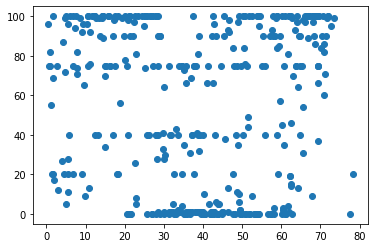

In [187]:
x_values = north_hem_df['lat']
y_values = north_hem_df['clouds']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('clouds')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

AttributeError: 'float' object has no attribute 'shape'

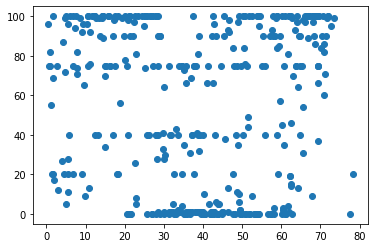

In [188]:
x_values = north_hem_df['lat']
y_values = north_hem_df['clouds']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('clouds')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0031183203212011013


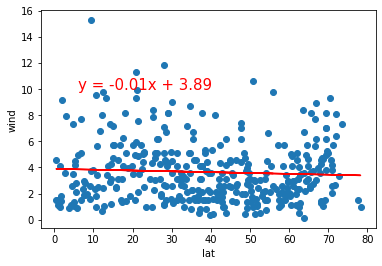

In [189]:
x_values = north_hem_df['lat']
y_values = north_hem_df['wind']

plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('lat')
plt.ylabel('wind')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression